<a href="https://colab.research.google.com/github/odeni3/kg-builder/blob/main/GRAPH_DANIEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!python -m spacy download en

⚠ As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the
full pipeline package name 'en_core_web_sm' instead.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 58.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
!pip install bs4

In [ ]:
!pip install pandas

In [ ]:
import re
import csv
import pandas as pd
import bs4
import requests
import spacy
from spacy import displacy
nlp = spacy.load('en_core_web_sm')

from spacy.matcher import Matcher
from spacy.tokens import Span

import urllib.request
from bs4 import BeautifulSoup

import networkx as nx

import matplotlib.pyplot as plt
from tqdm import tqdm

pd.set_option('display.max_colwidth', 200)
%matplotlib inline

In [ ]:
url = "https://encyclopedia.ushmm.org/content/pt-br/article/world-war-ii-in-europe"

In [ ]:
html = urllib.request.urlopen(url)

In [ ]:
htmlParse = BeautifulSoup(html, 'html.parser')

In [ ]:
htmlParse

<!DOCTYPE html>

<html dir="" lang="pt-br">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<link href="/favicon.ico" rel="icon" type="image/x-icon"/>
<meta content="pt-br" id="meta_lang"/>
<meta content="21" id="meta_lang_id"/>
<meta content="ltr" id="meta_text_direction"/>
<meta content="0" id="meta_new_data_count"/> <link href="https://encyclopedia.ushmm.org/content/ar/article/world-war-ii-in-europe" hreflang="ar" rel="alternate"/>
<link href="https://encyclopedia.ushmm.org/content/zh/article/world-war-ii-in-europe" hreflang="zh" rel="alternate"/>
<link href="https://encyclopedia.ushmm.org/content/en/article/world-war-ii-in-europe" hreflang="en" rel="alternate"/>
<link href="https://encyclopedia.ushmm.org/content/fr/article/world-war-ii-in-europe" hreflang="fr" rel="alternate"/>
<link href="https://encyclopedia.ushmm.org/content/de/article/world-war-ii-in-europe" hreflang="de"

In [ ]:

for para in htmlParse.find_all("p"):
    print(para.get_text())

Conteúdo em Destaque
Tags
Encontre tópicos de interesse e explore os conteúdos da Enciclopédia relacionados aos mesmos
Para estudantes
Holocausto: Um Local de Aprendizado para Estudantes
Imagens
Navegue através das fotografias e explore o conteúdo da Enciclopédia relacionado a tais imagens
História Pessoal
Explore as Carteiras de Identidade para aprender mais sobre diferentes experiências individuais durante o Holocausto
Leituras Importantes

:


O Holocausto aconteceu dentro do contexto maior da Segunda Guerra Mundial.  Esta guerra foi o maior e mais destrutivo conflito da história da humanidade.  Adolf Hitler e o regime nazistas buscavam criar um novo e vasto império no leste europeu, através da eliminação das populações lá existentes, criando assim um “espaço vital” (Lebensraum) para colocar os alemães.  O objetivo nazista de fortalecer a “raça superior” germânica, levou à perseguição e assassinato de milhões de judeus e de vários outros grupos considerados inferiores. 
A Alemanha i

In [ ]:

parsed_text_list = []

for para in htmlParse.find_all("p"):
    parsed_text_list.append(para.get_text())

In [ ]:
parsed_text_list

['Conteúdo em Destaque',
 'Tags',
 'Encontre tópicos de interesse e explore os conteúdos da Enciclopédia relacionados aos mesmos',
 'Para estudantes',
 'Holocausto: Um Local de Aprendizado para Estudantes',
 'Imagens',
 'Navegue através das fotografias e explore o conteúdo da Enciclopédia relacionado a tais imagens',
 'História Pessoal',
 'Explore as Carteiras de Identidade para aprender mais sobre diferentes experiências individuais durante o Holocausto',
 'Leituras Importantes',
 '\n:\n\n',
 'O Holocausto aconteceu dentro do contexto maior da Segunda Guerra Mundial.\xa0\xa0Esta guerra foi o maior e mais destrutivo conflito da história da humanidade.\xa0\xa0Adolf Hitler e o regime nazistas buscavam criar um novo e vasto império no leste europeu, através da eliminação das populações lá existentes, criando assim um “espaço vital” (Lebensraum) para colocar os alemães.\xa0\xa0O objetivo nazista de fortalecer a “raça superior” germânica, levou à perseguição e assassinato de milhões de jude

In [ ]:
parsed_text = ""

for para in htmlParse.find_all("p"):
    parsed_text = " ".join((parsed_text, str(para.get_text())))

In [ ]:
parsed_text

' Conteúdo em Destaque Tags Encontre tópicos de interesse e explore os conteúdos da Enciclopédia relacionados aos mesmos Para estudantes Holocausto: Um Local de Aprendizado para Estudantes Imagens Navegue através das fotografias e explore o conteúdo da Enciclopédia relacionado a tais imagens História Pessoal Explore as Carteiras de Identidade para aprender mais sobre diferentes experiências individuais durante o Holocausto Leituras Importantes \n:\n\n O Holocausto aconteceu dentro do contexto maior da Segunda Guerra Mundial.\xa0\xa0Esta guerra foi o maior e mais destrutivo conflito da história da humanidade.\xa0\xa0Adolf Hitler e o regime nazistas buscavam criar um novo e vasto império no leste europeu, através da eliminação das populações lá existentes, criando assim um “espaço vital” (Lebensraum) para colocar os alemães.\xa0\xa0O objetivo nazista de fortalecer a “raça superior” germânica, levou à perseguição e assassinato de milhões de judeus e de vários outros grupos considerados\xa

In [ ]:
for i in nlp(parsed_text).sents:
    print([i])

[ Conteúdo em Destaque Tags Encontre tópicos de interesse e explore os conteúdos da Enciclopédia relacionados aos mesmos Para estudantes Holocausto:]
[Um Local de Aprendizado para Estudantes Imagens Navegue através das fotografias e explore o conteúdo da Enciclopédia relacionado a tais imagens História Pessoal Explore as Carteiras de Identidade para aprender mais sobre diferentes experiências individuais durante o Holocausto Leituras Importantes 
:

 ]
[O Holocausto aconteceu dentro do contexto maior da Segunda Guerra Mundial.  ]
[Esta guerra foi o maior e mais destrutivo conflito da história da humanidade.  ]
[Adolf Hitler e o regime nazistas buscavam criar um novo e vasto império no leste europeu, através da eliminação das populações lá existentes, criando assim um “espaço vital” (Lebensraum) para colocar os alemães.  ]
[O objetivo nazista de fortalecer a “raça superior” germânica, levou à perseguição e assassinato de milhões de judeus e de vários outros grupos considerados inferiore

In [ ]:
sentences = [[i] for i in nlp(parsed_text).sents]
sentences = sentences[2:45]

In [ ]:
sentences

[[O Holocausto aconteceu dentro do contexto maior da Segunda Guerra Mundial.  ],
 [Esta guerra foi o maior e mais destrutivo conflito da história da humanidade.  ],
 [Adolf Hitler e o regime nazistas buscavam criar um novo e vasto império no leste europeu, através da eliminação das populações lá existentes, criando assim um “espaço vital” (Lebensraum) para colocar os alemães.  ],
 [O objetivo nazista de fortalecer a “raça superior” germânica, levou à perseguição e assassinato de milhões de judeus e de vários outros grupos considerados inferiores.  ],
 [A Alemanha iniciou a Segunda Guerra Mundial ao invadir a Polônia, no dia 1 de setembro de 1939. ],
 [Nos anos seguintes, a Alemanha invadiu outros onze países.
   
    ],
 [A Alemanha iniciou a Segunda Guerra Mundial ao invadir a Polônia, no dia 1 de setembro de 1939. ],
 [Nos anos seguintes, a Alemanha invadiu outros onze países.     ],
 [A maior parte dos judeus europeus vivia em países que a Alemanha viria a ocupar, ou influenciar, du

In [ ]:
import csv
myheaders = ['sentence']
myvalues = sentences
filename = 'article_text.csv'
with open(filename, 'w',newline='') as myfile:
    writer = csv.writer(myfile)
    writer.writerow(myheaders)
    writer.writerows(myvalues)

In [ ]:

import pandas as pd

csv_sentences = None

try:
    csv_sentences = pd.read_csv('article_text.csv')
    print(csv_sentences)
except pd.errors.EmptyDataError:
    print("Error: The CSV file is empty or has no columns to parse.")
except FileNotFoundError:
    print("Error: The CSV file was not found at the specified path.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")


                                                                                                                                                                                                   sentence
0                                                                                                                              O Holocausto aconteceu dentro do contexto maior da Segunda Guerra Mundial.  
1                                                                                                                           Esta guerra foi o maior e mais destrutivo conflito da história da humanidade.  
2   Adolf Hitler e o regime nazistas buscavam criar um novo e vasto império no leste europeu, através da eliminação das populações lá existentes, criando assim um “espaço vital” (Lebensraum) para colo...
3                                 O objetivo nazista de fortalecer a “raça superior” germânica, levou à perseguição e assassinato de milhões de judeus e de vários outros grupos conside

In [ ]:
csv_sentences.shape

(43, 1)

In [ ]:
csv_sentences['sentence'].sample(5)

,sentence
37,"Durante os três anos seguintes, as forças aéreas dos Aliados bombardearam sistematicamente instalações industriais e cidades por toda a região do Reich, reduzindo a escombros uma boa parte da área urbana alemã até 1945."
38,"No final de 1942 e início de 1943, as forças Aliadas obtiveram uma série de sucessos militares em"
11,"Entre os anos de 1941 e 1944, as autoridades nazistas alemães deportaram milhões de judeus da Alemanha, e também dos países unidos ao Eixo, enviando-os para os guetos e campos de extermínio nos territórios por eles ocupados."
34,Em 11 de dezembro a Alemanha e a Itália declararam guerra aos Estados Unidos.
26,"A Itália, como parte do “Eixo”, países aliados à Alemanha, aderiu à guerra em 10 de junho de 1940."


In [ ]:
doc = nlp("My name is Hami.")

for tok in doc:
  print(tok.text, "...", tok.dep_)

My ... poss
name ... nsubj
is ... ROOT
Hami ... attr
. ... punct


In [ ]:
def preprocess_text(text):
    doc = nlp(text.lower())
    tokens = [token.text for token in doc if token.text not in spacy.lang.en.stop_words.STOP_WORDS and token.is_alpha]
    return " ".join(tokens)

In [ ]:
def get_entities(sent):

  ent1 = ""
  ent2 = ""

  prv_tok_dep = ""
  prv_tok_text = ""

  prefix = ""
  modifier = ""


  for tok in nlp(sent):

    if tok.dep_ != "punct":

      if tok.dep_ == "compound":
        prefix = tok.text

        if prv_tok_dep == "compound":
          prefix = prv_tok_text + " "+ tok.text


      if tok.dep_.endswith("mod") == True:
        modifier = tok.text

        if prv_tok_dep == "compound":
          modifier = prv_tok_text + " "+ tok.text


      if tok.dep_.find("subj") == True:
        ent1 = modifier +" "+ prefix + " "+ tok.text
        prefix = ""
        modifier = ""
        prv_tok_dep = ""
        prv_tok_text = ""

      if tok.dep_.find("obj") == True:
        ent2 = modifier +" "+ prefix +" "+ tok.text

      prv_tok_dep = tok.dep_
      prv_tok_text = tok.text


  return [ent1.strip(), ent2.strip()]

In [ ]:
get_entities("The kid has 300 friends ")

['kid', '300  friends']

In [ ]:
get_entities("Joaquim is a friend of Cleyton.")

['Joaquim', 'Cleyton']

In [ ]:
entity_pairs = []

for i in tqdm(csv_sentences["sentence"]):
  entity_pairs.append(get_entities(i))

100%|██████████| 43/43 [00:02<00:00, 20.73it/s]


In [ ]:
entity_pairs[10:20]

[['judeus em', 'segunda Guerra Mundial'],
 ['enviando e também os', 'campos de extermínio nos territórios'],
 ['', 'partir do em'],
 ['', ''],
 ['', 'partir do em'],
 ['', ''],
 ['Holocausto aconteceu dentro', ''],
 ['de império vasto', 'com espansão germânica'],
 ['dominação alemã sobre', 'seus nova guerra'],
 ['Segunda Guerra Mundial', 'Polônia']]

In [ ]:
def get_relation(sent):

  doc = nlp(sent)

  # Matcher class object
  matcher = Matcher(nlp.vocab)

  #define the pattern
  pattern = [{'DEP':'ROOT'},
            {'DEP':'prep','OP':"?"},
            {'DEP':'agent','OP':"?"},
            {'POS':'ADJ','OP':"?"}]

  matcher.add("matching_1",[pattern])

  matches = matcher(doc)
  k = len(matches) - 1

  span = doc[matches[k][1]:matches[k][2]]

  return(span.text)

In [ ]:
get_relation("Daniel criou o arquivo")

'criou'

In [ ]:
relations = [get_relation(i) for i in tqdm(csv_sentences['sentence'])]

100%|██████████| 43/43 [00:02<00:00, 19.18it/s]


In [ ]:
pd.Series(relations).value_counts()[:50]

,count
países,3
dos,3
dia,3
diante,2
iniciou,2
para,2
do,2
dezembro,1
se,1
que,1


In [ ]:

source = [i[0] for i in entity_pairs]


target = [i[1] for i in entity_pairs]

kg_df = pd.DataFrame({'source':source, 'target':target, 'edge':relations})

In [ ]:

G=nx.from_pandas_edgelist(kg_df, "source", "target",
                          edge_attr=True, create_using=nx.MultiDiGraph())

In [ ]:
for sent in csv_sentences["sentence"]:
    entities = get_entities(sent)
    relation = get_relation(sent)
    print(f"Sentence: {sent}")
    print(f"Entities: {entities}")
    print(f"Relation: {relation}")
    print("-" * 50)

Sentence: O Holocausto aconteceu dentro do contexto maior da Segunda Guerra Mundial.  
Entities: ['Holocausto aconteceu dentro', 'Segunda Guerra Mundial']
Relation: contexto
--------------------------------------------------
Sentence: Esta guerra foi o maior e mais destrutivo conflito da história da humanidade.  
Entities: ['', '']
Relation: humanidade
--------------------------------------------------
Sentence: Adolf Hitler e o regime nazistas buscavam criar um novo e vasto império no leste europeu, através da eliminação das populações lá existentes, criando assim um “espaço vital” (Lebensraum) para colocar os alemães.  
Entities: ['Adolf Hitler', 'Lebensraum espaço alemães']
Relation: colocar os
--------------------------------------------------
Sentence: O objetivo nazista de fortalecer a “raça superior” germânica, levou à perseguição e assassinato de milhões de judeus e de vários outros grupos considerados inferiores.  
Entities: ['', '']
Relation: fortalecer
----------------------

In [ ]:
filtered_entity_pairs = []
filtered_relations = []

for i in range(len(entity_pairs)):
    if entity_pairs[i][0] and entity_pairs[i][1] and relations[i]:
        filtered_entity_pairs.append(entity_pairs[i])
        filtered_relations.append(relations[i])

source = [i[0] for i in filtered_entity_pairs]
target = [i[1] for i in filtered_entity_pairs]

kg_df = pd.DataFrame({'source': source, 'target': target, 'edge': filtered_relations})

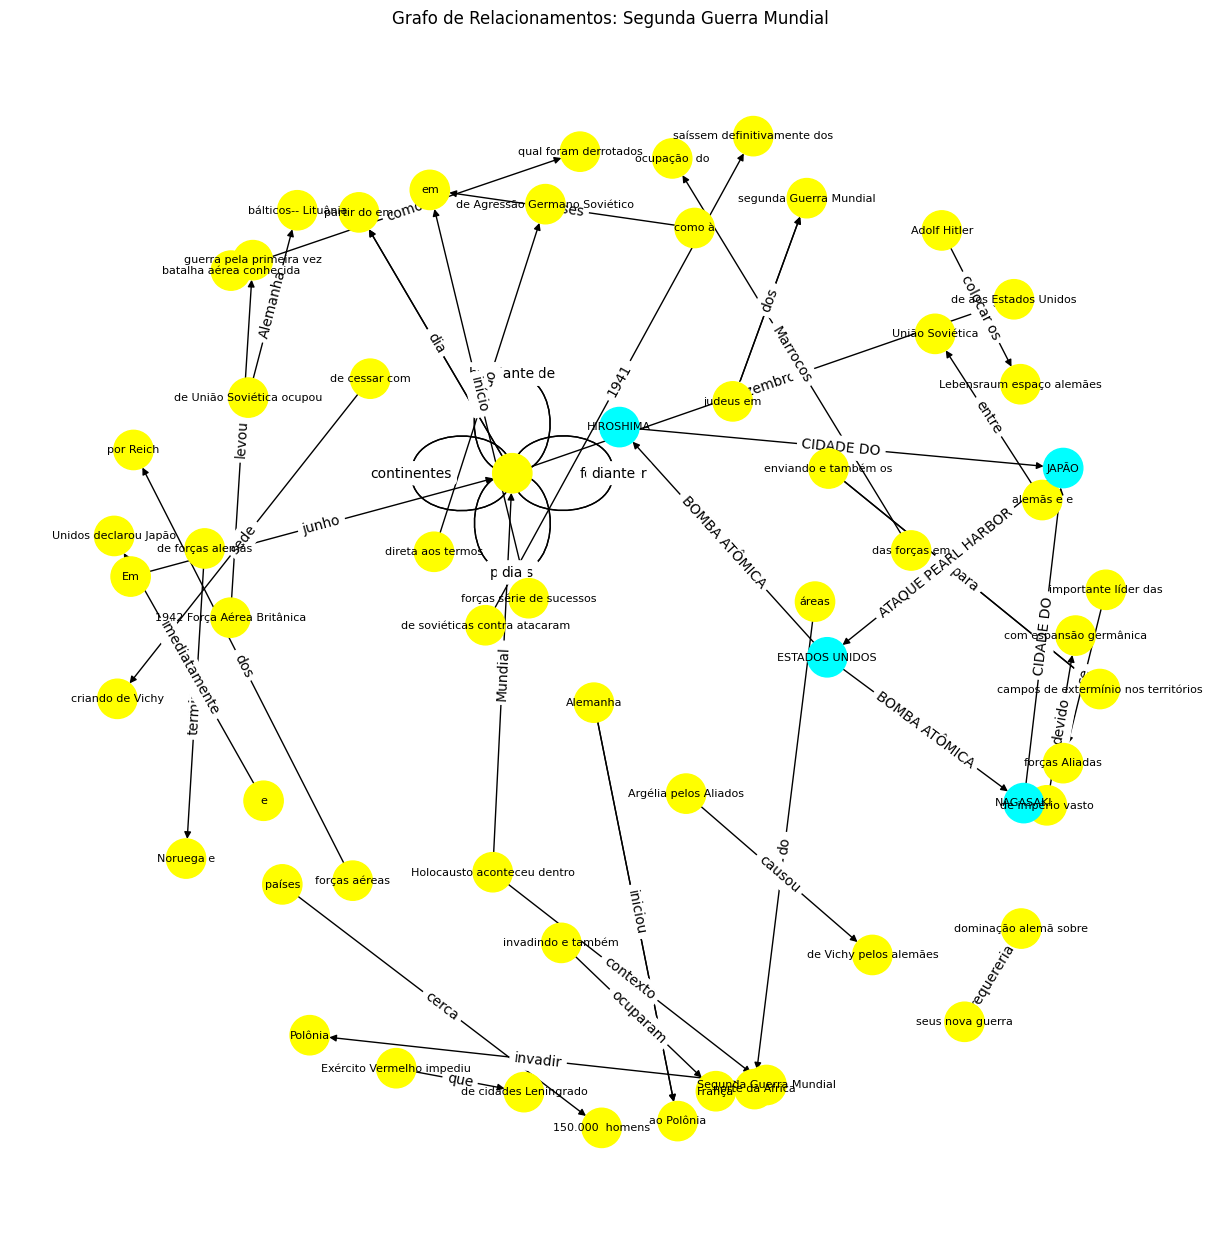

In [ ]:
source = [i[0] for i in entity_pairs]

target = [i[1] for i in entity_pairs]

kg_df = pd.DataFrame({'source': source, 'target': target, 'edge': relations})

G = nx.from_pandas_edgelist(kg_df, "source", "target", edge_attr=True, create_using=nx.MultiDiGraph())

#FUNÇÃO PARA ADICIONAR NODE
def adicionar_node(node, g):
    g.add_node(node)

#FUNÇÃO PARA ADICIONAR RELACIONAMENTO
def adicionar_relacionamento(x, y, edge, g):
    g.add_edge(x, y, edge=edge)

#FUNÇÃO PARA REMOVER NODE
def remover_node(node, g):
    if g.has_node(node):
        g.remove_node(node)

#FUNÇÃO PARA REMOVER RELACIONAMENTO
def remover_relacionamento(x, y, g):
    if g.has_edge(x, y):
        g.remove_edge(x, y)

adicionar_node("ESTADOS UNIDOS", G)
adicionar_node("JAPÃO", G)
adicionar_node("HIROSHIMA", G)
adicionar_node("NAGASAKI", G)

adicionar_relacionamento("JAPÃO", "ESTADOS UNIDOS", "ATAQUE PEARL HARBOR", G)
adicionar_relacionamento("ESTADOS UNIDOS", "HIROSHIMA", "BOMBA ATÔMICA", G)
adicionar_relacionamento("ESTADOS UNIDOS", "NAGASAKI", "BOMBA ATÔMICA", G)
adicionar_relacionamento("NAGASAKI", "JAPÃO", "CIDADE DO", G)
adicionar_relacionamento("HIROSHIMA", "JAPÃO", "CIDADE DO", G)

#apenas modificando cor dos nodes e relacionamentos adicionados
node_colors = []
for node in G.nodes:
    if node in ["ESTADOS UNIDOS", "JAPÃO", "HIROSHIMA", "NAGASAKI"]:
        node_colors.append('cyan')
    else:
        node_colors.append('yellow')

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G, k=0.7)
nx.draw(G, pos, with_labels=True, node_color=node_colors, edge_cmap=plt.cm.Blues, node_size=800, font_size=8)
nx.draw_networkx_edge_labels(G, pos, edge_labels=nx.get_edge_attributes(G, 'edge'))
plt.title('Grafo de Relacionamentos: Segunda Guerra Mundial')
plt.show()

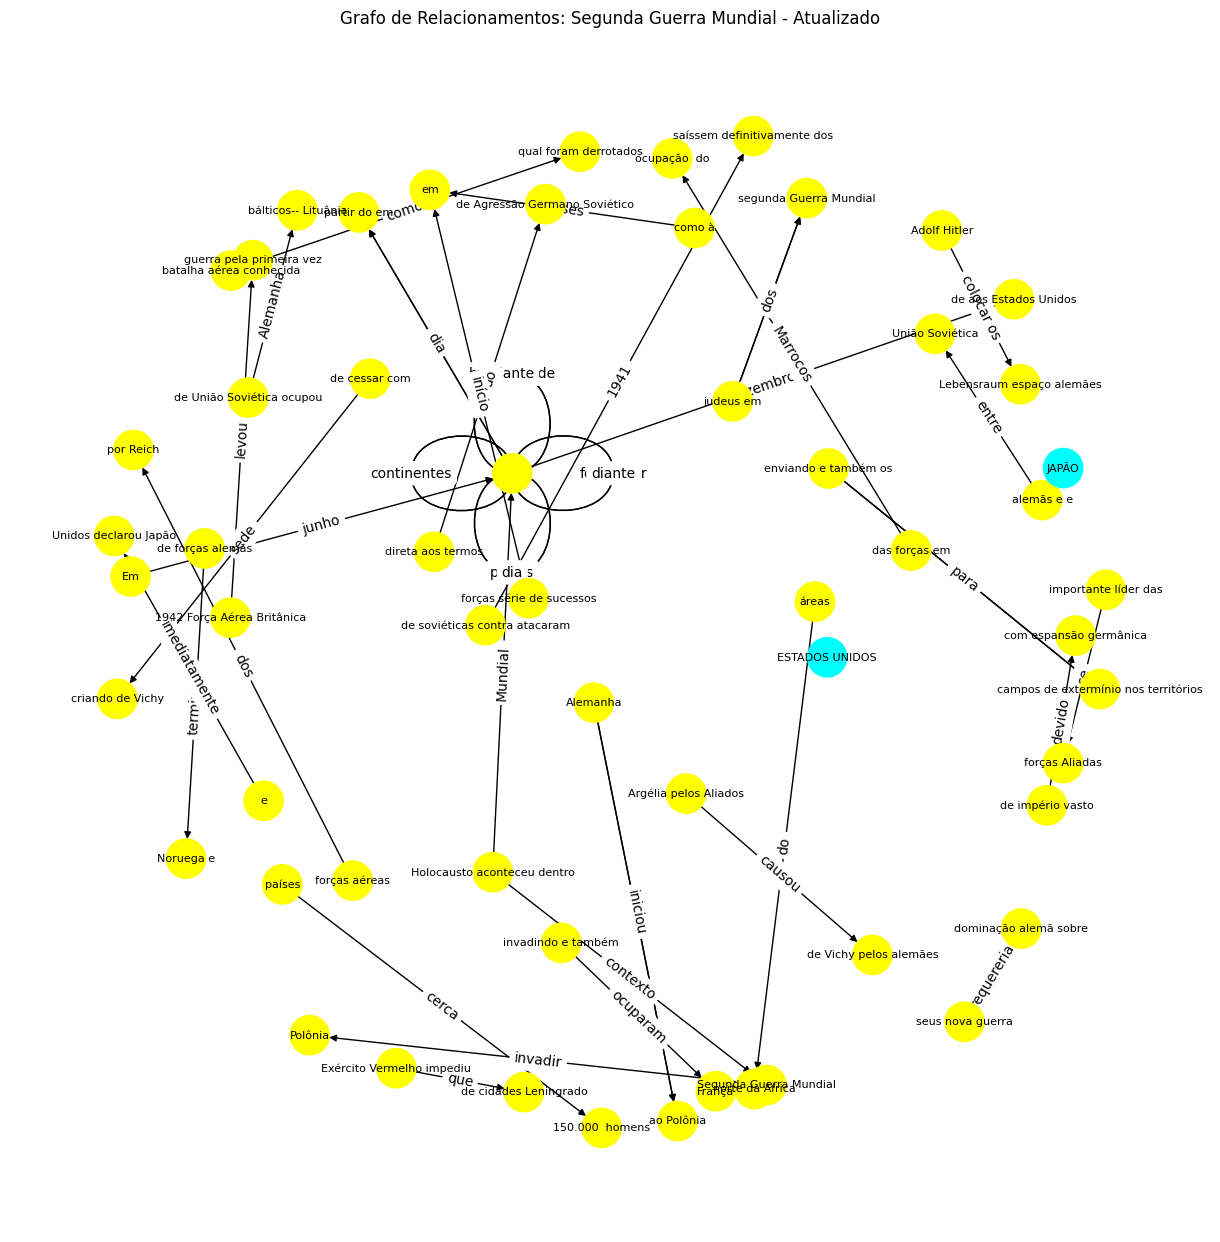

In [ ]:
remover_node("HIROSHIMA", G)
remover_node("NAGASAKI", G)
remover_relacionamento("JAPÃO", "ESTADOS UNIDOS", G)


node_colors = []
for node in G.nodes:
    if node in ["ESTADOS UNIDOS", "JAPÃO", "NAGASAKI"]:
        node_colors.append('cyan')
    else:
        node_colors.append('yellow')

plt.figure(figsize=(12, 12))
nx.draw(G, pos, with_labels=True, node_color=node_colors, edge_cmap=plt.cm.Blues, node_size=800, font_size=8)
nx.draw_networkx_edge_labels(G, pos, edge_labels=nx.get_edge_attributes(G, 'edge'))
plt.title('Grafo de Relacionamentos: Segunda Guerra Mundial - Atualizado')
plt.show()

In [ ]:
#FUNÇÃO PARA CHECAR SE NODE EXISTE
def checar_node_existente(node, g):
    if g.has_node(node):
        print(f"O nó '{node}' existe no grafo.")
    else:
        print(f"O nó '{node}' não existe no grafo.")

checar_node_existente("ESTADOS UNIDOS", G)

O nó 'ESTADOS UNIDOS' existe no grafo.


In [ ]:
#FUNÇÃO PARA CHECAR SE RELACIONAMENTO EXISTE
def checar_relacionamento_existente(source_node, target_node, g):
    if g.has_edge(source_node, target_node):
        edge_data = g.get_edge_data(source_node, target_node)

        edge_names = [data['edge'] for key, data in edge_data.items()]

        print(f"A aresta entre '{source_node}' e '{target_node}' existe no grafo.")
        print(f"Nomes das arestas: {edge_names}")
    else:
        print(f"A aresta entre '{source_node}' e '{target_node}' não existe no grafo.")

checar_relacionamento_existente("JAPÃO", "ESTADOS UNIDOS", G)
checar_relacionamento_existente("áreas", "norte da África", G)


A aresta entre 'JAPÃO' e 'ESTADOS UNIDOS' não existe no grafo.
A aresta entre 'áreas' e 'norte da África' existe no grafo.
Nomes das arestas: ['do']
